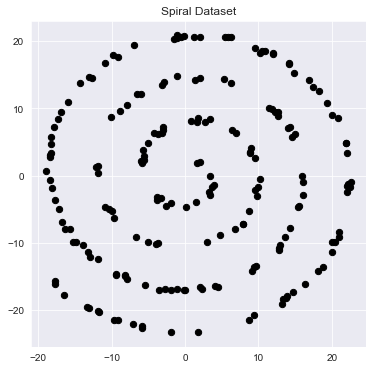

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.random.seed(8888)

# spiral dataset
n = np.sqrt(np.random.rand(200, 1)) * 1400 * (2 * np.pi) / 360
dlx = -np.cos(n) * n + np.random.rand(200, 1) * .8
dly = np.sin(n) * n + np.random.rand(200, 1) * .8

plt.scatter(dlx, dly, c = 'black', s=40)
plt.title('Spiral Dataset')
X = np.hstack((dlx, dly))

In [10]:
X

array([[-9.14314745e+00, -2.14466677e+01],
       [-1.08644440e+00,  2.08346244e+01],
       [ 1.42637939e+01, -7.81429727e+00],
       [ 3.64566144e+00, -1.62862982e+00],
       [-5.89001190e+00,  1.82535842e+00],
       [ 2.19762621e+01,  4.81788420e+00],
       [-1.82296132e+01,  3.43288924e+00],
       [-1.85523756e+00, -1.70460848e+01],
       [ 8.83181382e+00,  3.58008055e+00],
       [-1.47796195e+01, -9.86185483e+00],
       [-1.67372324e+01, -6.87316860e+00],
       [-3.77350676e+00, -3.64121921e+00],
       [-1.76781545e+01, -3.65185648e+00],
       [ 2.10008600e+01, -8.32050837e+00],
       [-1.17218737e+01, -2.03064883e+01],
       [-3.04529795e+00,  7.24187608e+00],
       [-1.59118884e+01,  1.10099014e+01],
       [ 1.19781438e+01,  1.80097652e+01],
       [-9.33094186e+00, -1.45951484e+01],
       [-1.17879025e+01,  4.41274429e-01],
       [-5.86228975e-01,  2.05955353e+01],
       [ 1.82170737e+01,  1.25934214e+01],
       [-1.56121104e+01, -7.87255390e+00],
       [ 8.

In [5]:
X.shape

(200, 2)

In [4]:
# compute pairwise distance matrix to find K nearest neighbors for each x_i in X
from sklearn.metrics import pairwise_distances

dist_matrix = pairwise_distances(X)
dist_matrix

array([[ 0.        , 43.04205062, 27.08738503, ..., 26.03336938,
        19.6655733 , 28.17629856],
       [43.04205062,  0.        , 32.50216192, ..., 19.01778957,
        36.41039031, 14.86697397],
       [27.08738503, 32.50216192,  0.        , ..., 15.73747861,
         8.14599548, 22.79907766],
       ...,
       [26.03336938, 19.01778957, 15.73747861, ...,  0.        ,
        17.67516454,  7.06905134],
       [19.6655733 , 36.41039031,  8.14599548, ..., 17.67516454,
         0.        , 24.03027654],
       [28.17629856, 14.86697397, 22.79907766, ...,  7.06905134,
        24.03027654,  0.        ]])

In [6]:
dist_matrix.shape

(200, 200)

In [12]:
# function that outputs N x k matrix with k nearest neighbors for each observation in X
def knn(X, k):
    knn_matrix = np.zeros((len(X), k))
    dist_matrix = pairwise_distances(X)

    for i in range(len(X)):
        knn_matrix[i] = dist_matrix[i, :].argsort()[1:k+1]
    return knn_matrix

X_neighbors = knn(X, k=10)
X_neighbors

array([[ 73., 130.,  14., ...,  95.,  76., 170.],
       [135.,  20.,  24., ...,  65., 149.,  91.],
       [ 35., 186.,  98., ...,  54., 169.,  60.],
       ...,
       [ 26.,  56., 107., ...,  87.,  89., 123.],
       [162., 155., 180., ..., 131., 158., 116.],
       [118., 143., 194., ...,  51., 168.,   4.]])

In [14]:
X_neighbors[0]

array([ 73., 130.,  14., 159., 125., 139., 192.,  95.,  76., 170.])

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], alpha=.3, c='black', s=50)

for i in range(len(X)):
    neighbors = X_neighbors[i]
    for j in range(len(neighbors)):
        plt.plot()